In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('https://media.githubusercontent.com/media/mayurasandakalum/datasets/main/shop-customer-data/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


remove null values

In [6]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
df = df.dropna(subset=['Profession'])
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [8]:
df.shape

(1965, 8)

In [9]:
df[df['Age'] < 18].count()

CustomerID                327
Gender                    327
Age                       327
Annual Income ($)         327
Spending Score (1-100)    327
Profession                327
Work Experience           327
Family Size               327
dtype: int64

There are some inconsistant data rows with below age 18.
So that, I assume that cannot be happen. so that. i devided to remove them

In [10]:
df1 = df[~(df['Age'] < 18)]
df1.shape

(1638, 8)

get column names

In [73]:
def get_column_mames(df):
    all_columns = df.columns.to_list()

    categorical_columns = df.select_dtypes(include=["object"]).columns.to_list()

    numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.to_list()

    return {
        "all_columns": all_columns,
        "categorical_columns": categorical_columns,
        "numerical_columns": numerical_columns,
    }



column_names = get_column_mames(df1)

print(column_names.all_columns)
print(column_names.categorical_columns)
print(column_names.numerical_columns)

AttributeError: 'dict' object has no attribute 'all_columns'

In [12]:
for column in numerical_columns:
    if column == "Work Experience":
        continue
    
    index = df1[column].value_counts().sort_index().index[0]
    
    if index == 0:
        print(column)
        print(f"{df1[column].value_counts().sort_index().index[0]} - {df1[column].value_counts().sort_index().values[0]}")

Annual Income ($)
0 - 2
Spending Score (1-100)
0 - 1


In [13]:
for column in numerical_columns:
    if column == "Work Experience":
        continue

    index = df1[column].value_counts().sort_index().index[0]

    if index == 0:
        df1 = df1[df1[column] != 0]

In [14]:
df1.shape

(1635, 8)

In [15]:
for column in ["Gender", "Profession"]:
    print(df1[column].value_counts())
    print("\n")

Gender
Female    973
Male      662
Name: count, dtype: int64


Profession
Artist           513
Healthcare       281
Entertainment    197
Engineer         156
Executive        126
Doctor           126
Lawyer           118
Marketing         68
Homemaker         50
Name: count, dtype: int64




outliers

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1635 non-null   int64 
 1   Gender                  1635 non-null   object
 2   Age                     1635 non-null   int64 
 3   Annual Income ($)       1635 non-null   int64 
 4   Spending Score (1-100)  1635 non-null   int64 
 5   Profession              1635 non-null   object
 6   Work Experience         1635 non-null   int64 
 7   Family Size             1635 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 115.0+ KB


In [17]:
df2 = df1.drop('CustomerID', axis=1)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1635 non-null   object
 1   Age                     1635 non-null   int64 
 2   Annual Income ($)       1635 non-null   int64 
 3   Spending Score (1-100)  1635 non-null   int64 
 4   Profession              1635 non-null   object
 5   Work Experience         1635 non-null   int64 
 6   Family Size             1635 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 102.2+ KB


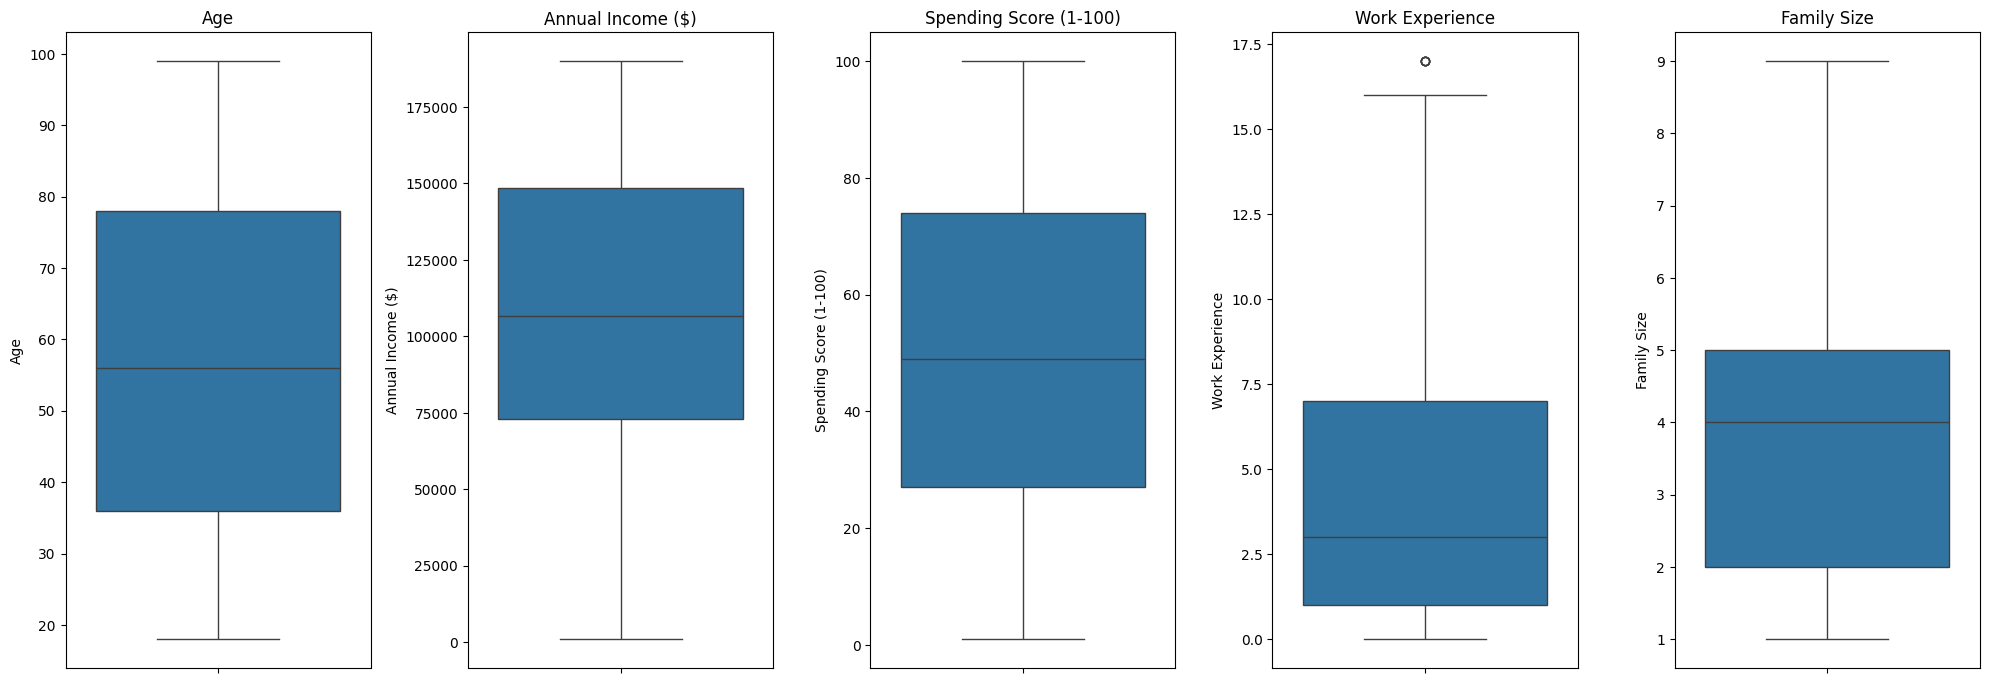

In [19]:

plt.figure(figsize=(20, 20))

# Track the current plot index
plot_index = 1

# Iterate through columns and create boxplots for each numerical column
for column in df2.columns:
    if column in categorical_columns:
        continue
    
    plt.subplot(3, 5, plot_index)
    sns.boxplot(data=df2[column])
    plt.title(column)
    plot_index += 1

plt.tight_layout()
plt.show()


In [20]:
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_columns

['Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Work Experience',
 'Family Size']

In [21]:
# remove outliers
for column in numerical_columns:
    if column:
        q1 = df2[column].quantile(0.25)
        q3 = df2[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df2 = df2[(df2[column] > lower_bound) & (df2[column] < upper_bound)]

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1625 non-null   object
 1   Age                     1625 non-null   int64 
 2   Annual Income ($)       1625 non-null   int64 
 3   Spending Score (1-100)  1625 non-null   int64 
 4   Profession              1625 non-null   object
 5   Work Experience         1625 non-null   int64 
 6   Family Size             1625 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 101.6+ KB


Standardization

In [23]:
df2.describe().round(3)

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1625.000,1625.000,1625.000,1625.000,1625.000
mean,57.088,109026.625,50.476,3.941,3.743
std,23.840,46289.084,27.700,3.792,1.953
min,18.000,1000.000,1.000,0.000,1.000
25%,36.000,72594.000,28.000,1.000,2.000
50%,56.000,106669.000,50.000,3.000,4.000
75%,78.000,148520.000,74.000,7.000,5.000
max,99.000,189974.000,100.000,15.000,9.000


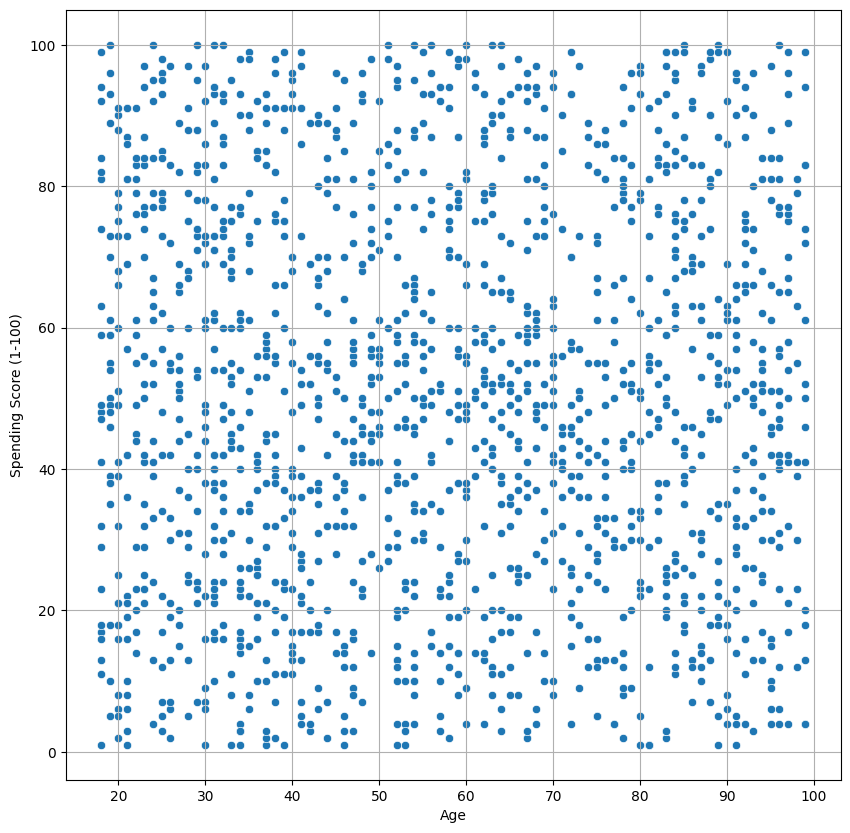

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df2, x='Age', y='Spending Score (1-100)')
plt.grid()
plt.show()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1625 non-null   object
 1   Age                     1625 non-null   int64 
 2   Annual Income ($)       1625 non-null   int64 
 3   Spending Score (1-100)  1625 non-null   int64 
 4   Profession              1625 non-null   object
 5   Work Experience         1625 non-null   int64 
 6   Family Size             1625 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 101.6+ KB


In [26]:
scaleStandard = StandardScaler()
df2[numerical_columns] = scaleStandard.fit_transform(df2[numerical_columns])

In [27]:
df2.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300


In [28]:
df2.describe().round(3)

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1625.000,1625.000,1625.000,1625.000,1625.000
mean,-0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.640,-2.334,-1.787,-1.040,-1.405
25%,-0.885,-0.787,-0.812,-0.776,-0.893
50%,-0.046,-0.051,-0.017,-0.248,0.132
75%,0.877,0.853,0.850,0.807,0.644
max,1.759,1.749,1.788,2.918,2.693


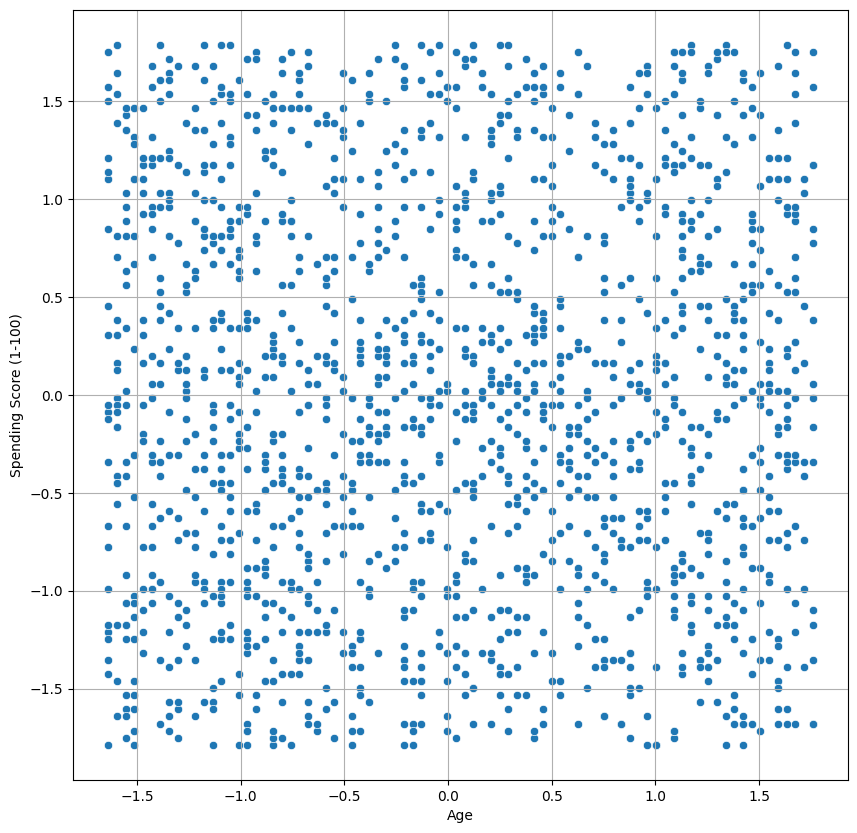

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df2, x='Age', y='Spending Score (1-100)')
plt.grid()
plt.show()

correlation

In [30]:
df2.head()


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300


<Axes: >

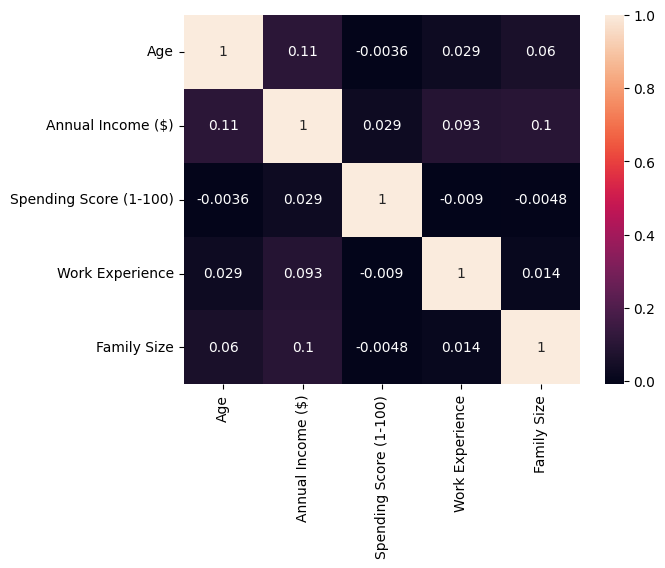

In [31]:
df2[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].corr()

sns.heatmap(df2[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].corr(), annot=True)


use pca to reduce dimensions

In [32]:
df2.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300


In [33]:
pca = PCA()
df2_pca = pca.fit_transform(df2[numerical_columns])

In [34]:
explained_variance = pca.explained_variance_ratio_

In [35]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

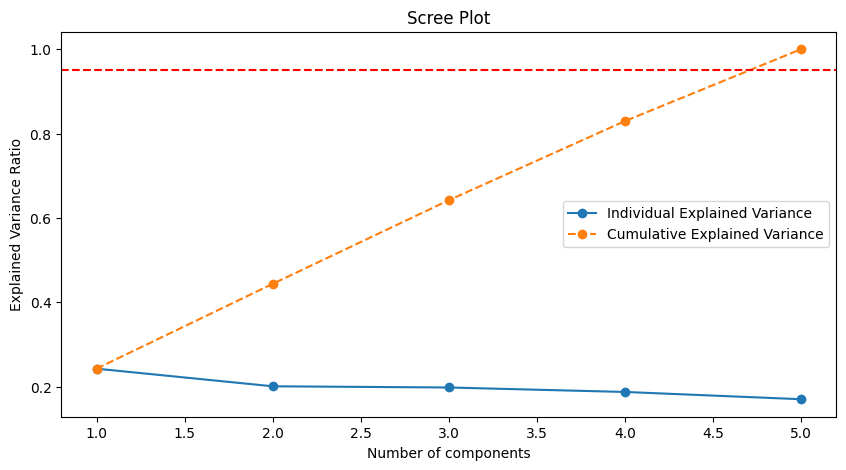

In [36]:
# scree plot
plt.figure(figsize=(10, 5))
plt.plot(
    np.arange(1, len(explained_variance) + 1),
    explained_variance,
    marker="o",
    label="Individual Explained Variance",
)
plt.plot(
    np.arange(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker="o",
    linestyle="--",
    label="Cumulative Explained Variance",
)
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.legend()
plt.show()

In [37]:
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

Number of components to retain 95% variance: 5


alternative way

In [38]:
pca = PCA(0.95)
df2_pca = pca.fit_transform(df2[numerical_columns])
df2_pca.shape

(1625, 5)

In [49]:
type(df2_pca)

numpy.ndarray

In [51]:
pd.DataFrame(df2_pca, columns=[f"PC{i}" for i in range(5)]).head()

,PC0,PC1,PC2,PC3,PC4
0,-2.325394,-0.379519,-0.516924,-1.092425,-0.679536
1,-1.975754,1.043787,0.381871,-0.811179,-0.690298
2,-2.103968,-1.335048,0.240483,-0.136233,1.240811
3,-2.143167,1.128890,0.011502,-0.325196,0.191250
4,-1.187746,-0.403192,-0.903998,-1.422215,-0.939807


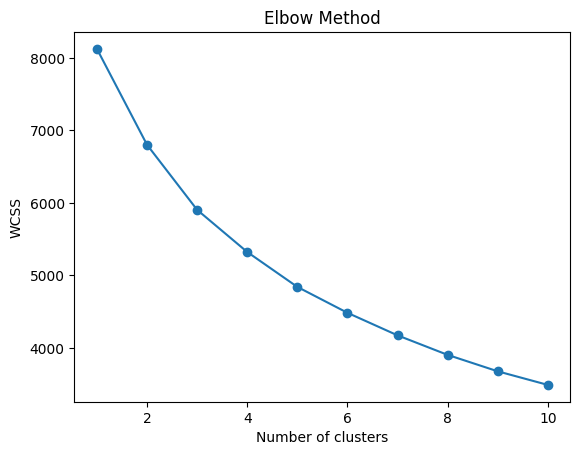

In [47]:
# Selecting the features to include in the KMeans clustering
X = df2[numerical_columns]

# List to hold the within sum of squares for each number of clusters
wcss = []

# Loop over different values of k (number of clusters)
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

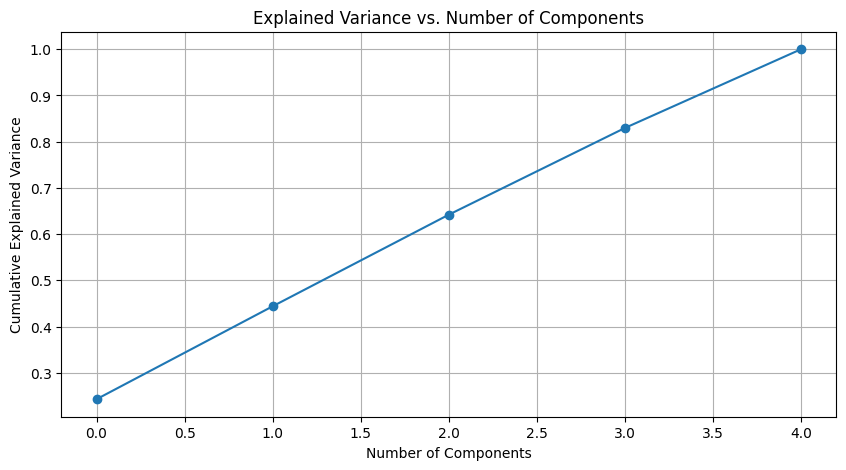

                             PC1       PC2       PC3
Age                     0.495494 -0.049272 -0.262087
Annual Income ($)       0.633086  0.102765  0.093679
Spending Score (1-100)  0.050127  0.972057  0.128991
Work Experience         0.370326 -0.202906  0.805823
Family Size             0.462638 -0.030759 -0.506503
Best features to use for K-means clustering: Index(['Annual Income ($)', 'Age', 'Family Size', 'Work Experience',
       'Spending Score (1-100)'],
      dtype='object')


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df2' is your DataFrame and 'numerical_columns' is a list of column names with numerical data
data = df2[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plot the explained variance to decide the number of components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Analyze the loadings to determine feature importance
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=data.columns)

# Display the loadings for the first few principal components
print(loadings.iloc[:, :3])

# Define the number of features you want to select
k = 5  # or any number you decide based on your analysis

# Choose the best features based on the loadings
# For simplicity, let's choose the features with the highest absolute values in the first principal component
best_features = loadings.iloc[:, 0].abs().sort_values(ascending=False).index[:k]

print("Best features to use for K-means clustering:", best_features)


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

# load iris dataset
iris = datasets.load_iris()

X = scale(iris.data)
y = iris.target

# apply PCA
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)

In [62]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=iris.feature_names)
loadings

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942
